In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as pl 

%matplotlib inline

In [54]:
data_train = pd.read_csv('census-income_train.csv.data', header=None)
data_test = pd.read_csv('census-income_test.csv.test', header=None)

In [55]:
columns_names = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVAL']
dict_names = dict(zip(data_train.columns[::], [columns_name for columns_name in columns_names]))

data_train = data_train.rename(columns=dict_names)
data_test = data_test.rename(columns=dict_names)

In [12]:
data_train['MIGSUN'].value_counts()

 Not in universe    84054
 No                  9987
 Yes                 5786
Name: MIGSUN, dtype: int64

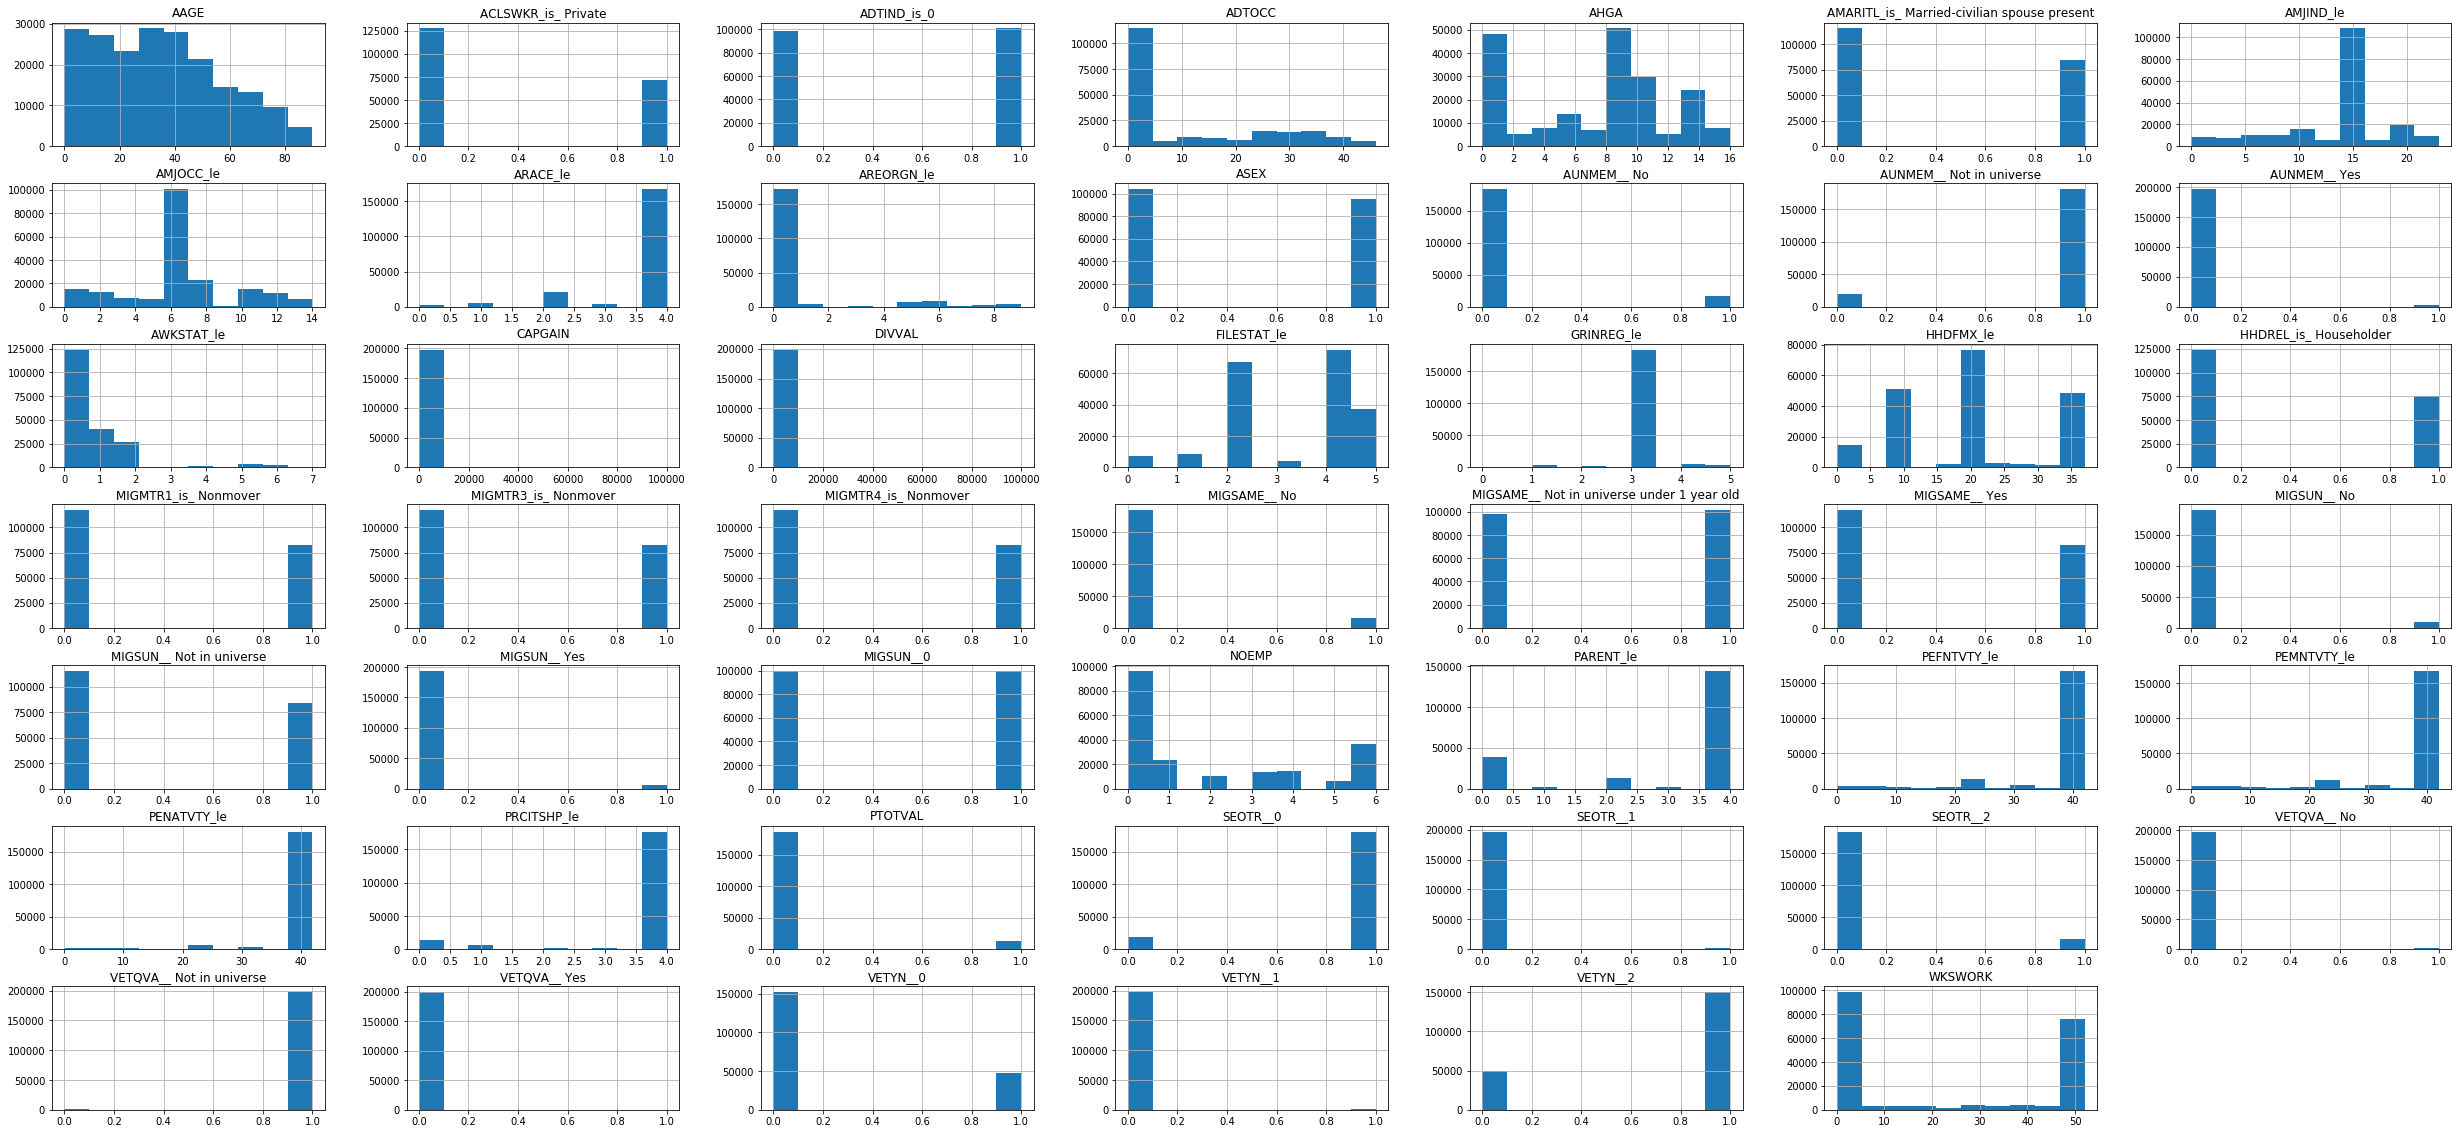

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 43, 20
data_train.hist();



In [5]:
data_test.head(5)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVAL
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


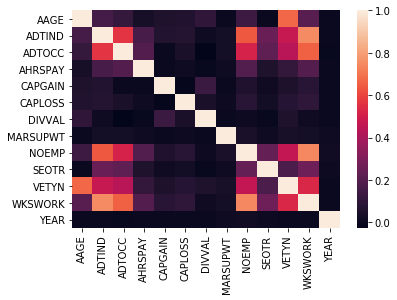

In [6]:
sns.heatmap(data_train.corr());

In [7]:
data_train.corr()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,MARSUPWT,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
AAGE,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,-0.001611,0.140887,-0.002265,0.674844,0.206181,0.004413
ADTIND,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.029388,0.642096,0.252694,0.476475,0.754472,0.003430
ADTOCC,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.027047,0.515554,0.228952,0.438680,0.655613,-0.003140
AHRSPAY,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.012353,0.191543,0.054051,0.113094,0.195687,0.002283
CAPGAIN,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.002549,0.058015,0.015048,0.051530,0.083549,0.005243
CAPLOSS,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.008052,0.084255,0.024116,0.075391,0.100762,0.000096
DIVVAL,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,-0.000009,0.007206,-0.004885,0.054585,0.013823,0.001913
MARSUPWT,-0.001611,0.029388,0.027047,0.012353,0.002549,0.008052,-0.000009,1.000000,0.042778,0.012328,0.040507,0.029240,0.011765
NOEMP,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,0.042778,1.000000,0.240553,0.463334,0.747302,0.018774
SEOTR,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.012328,0.240553,1.000000,0.177448,0.265872,0.007377


C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


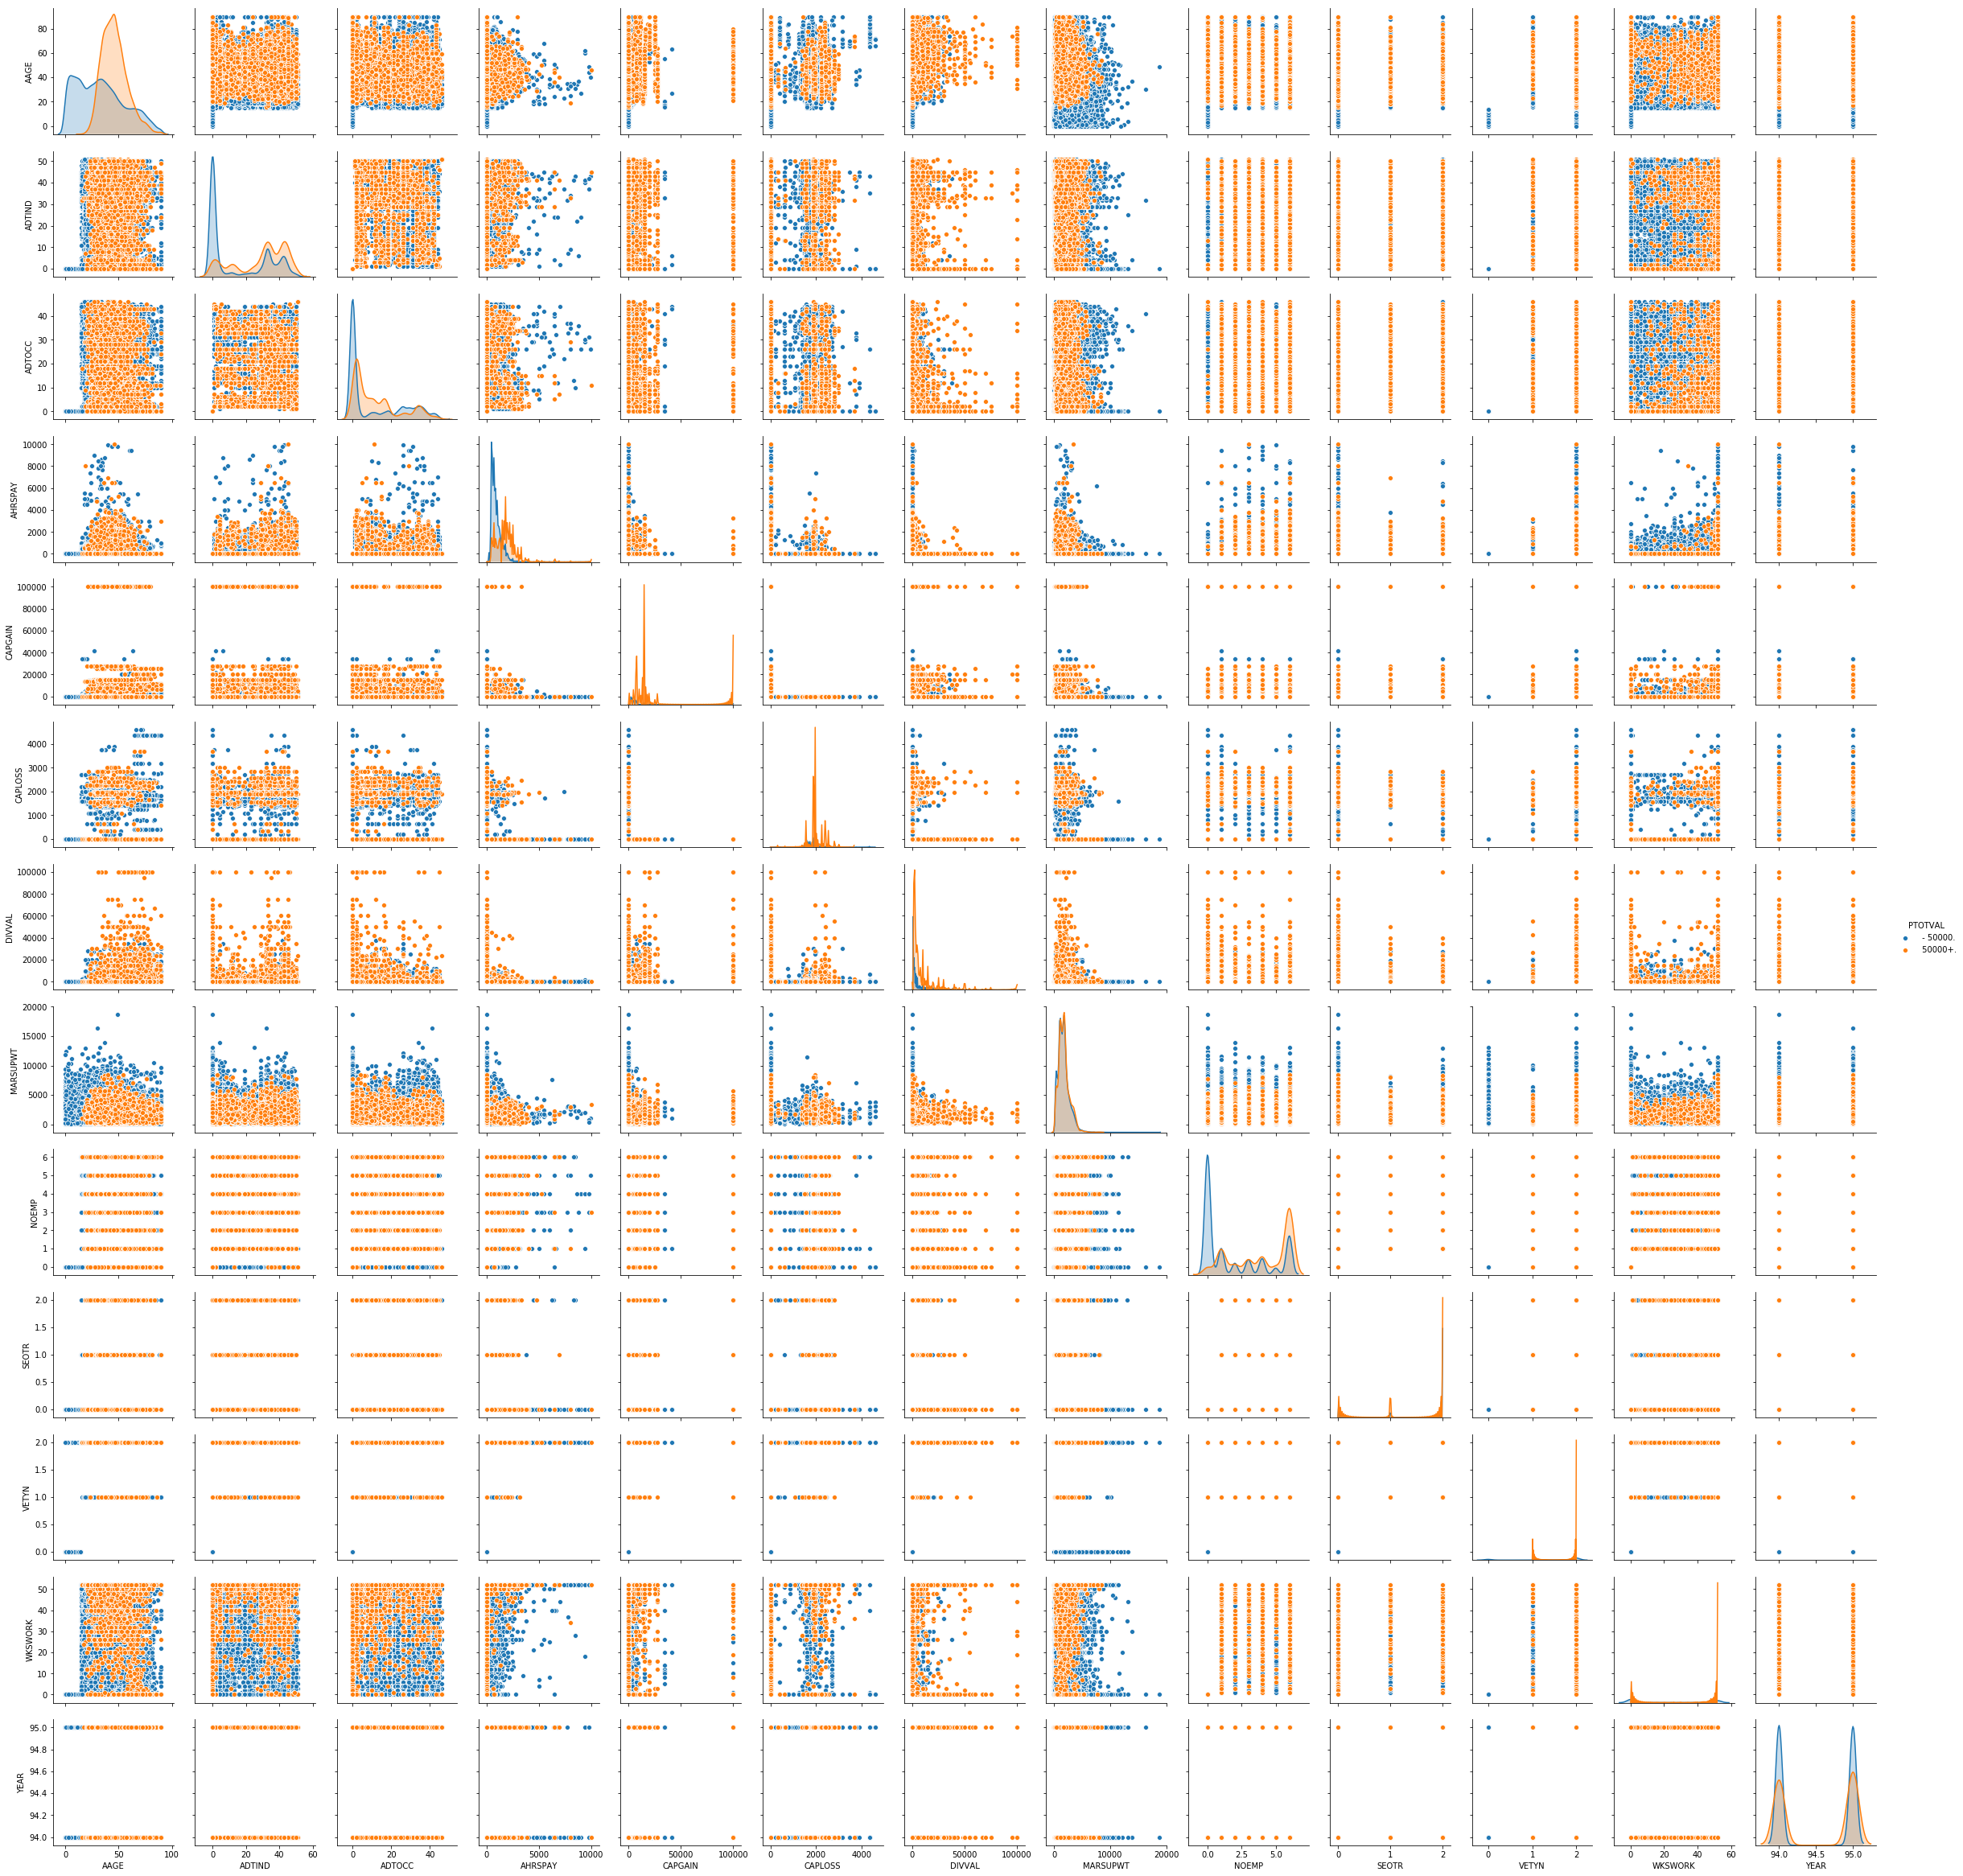

In [16]:
sns.pairplot(data_train, hue='PTOTVAL');

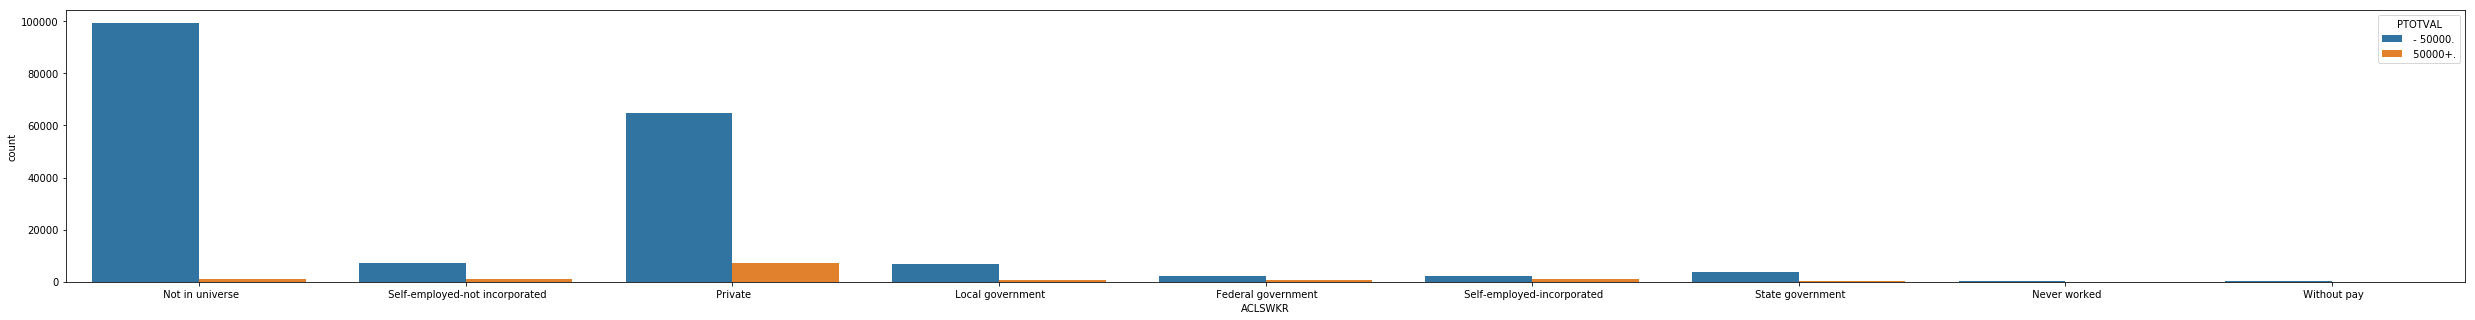

In [4]:
sns.countplot(x='ACLSWKR', hue='PTOTVAL', data=data_train);

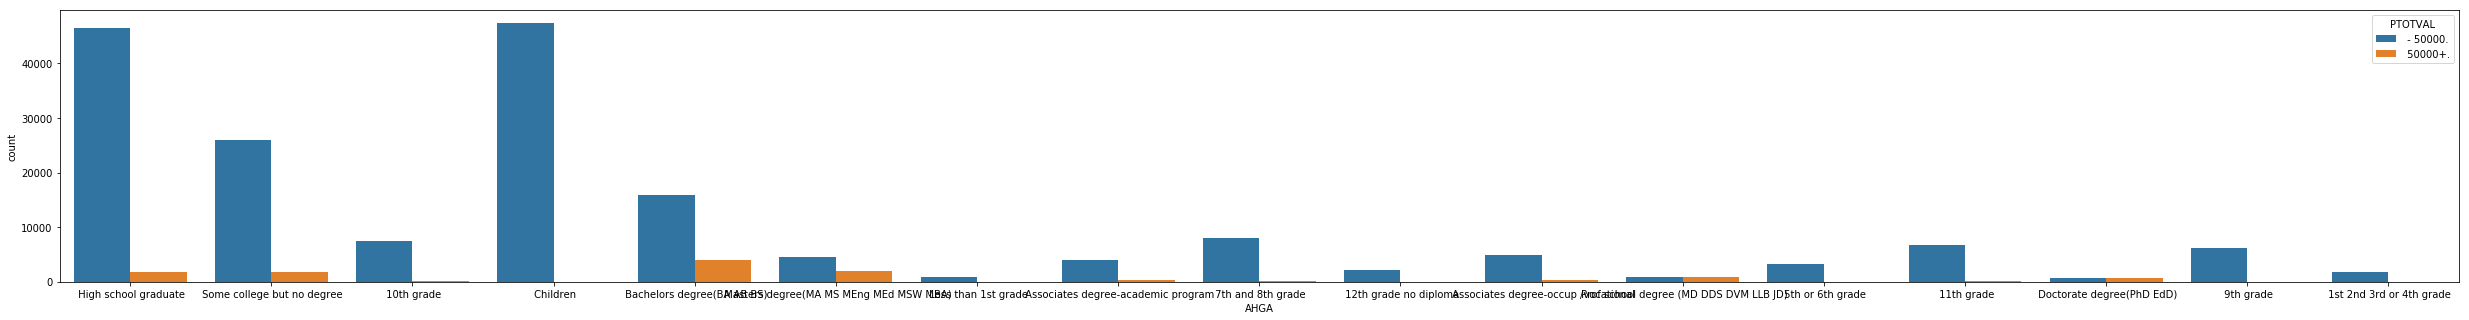

In [7]:
sns.countplot(x='AHGA', hue='PTOTVAL', data=data_train);

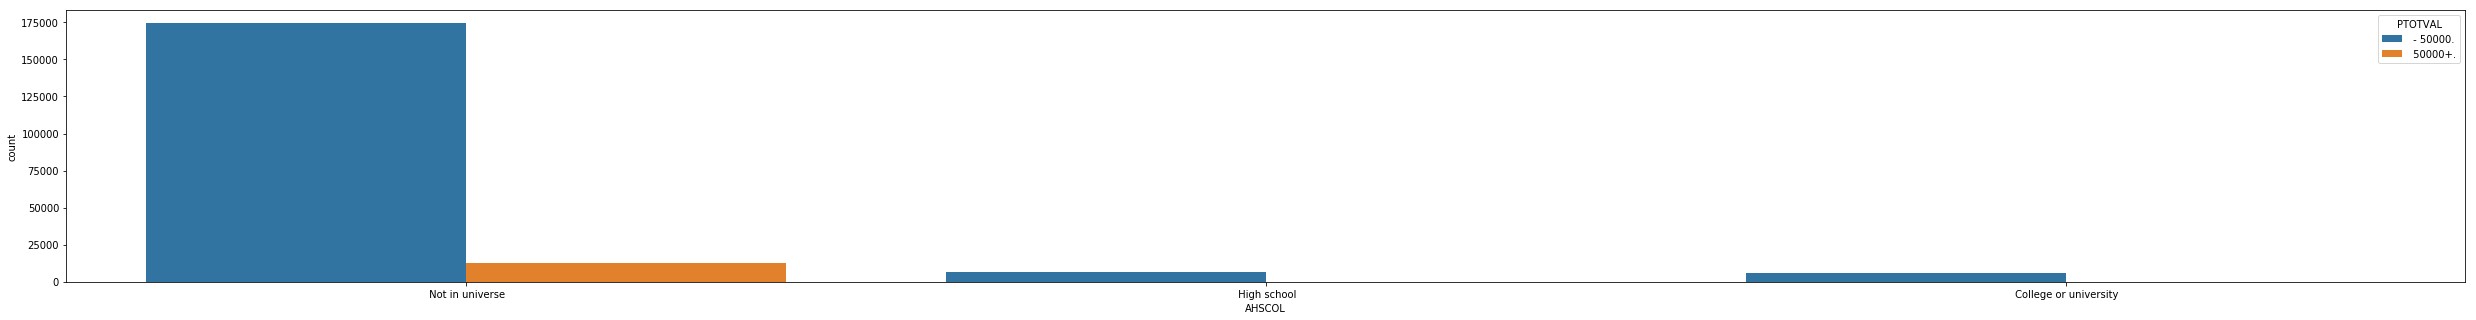

In [8]:
sns.countplot(x='AHSCOL', hue='PTOTVAL', data=data_train);

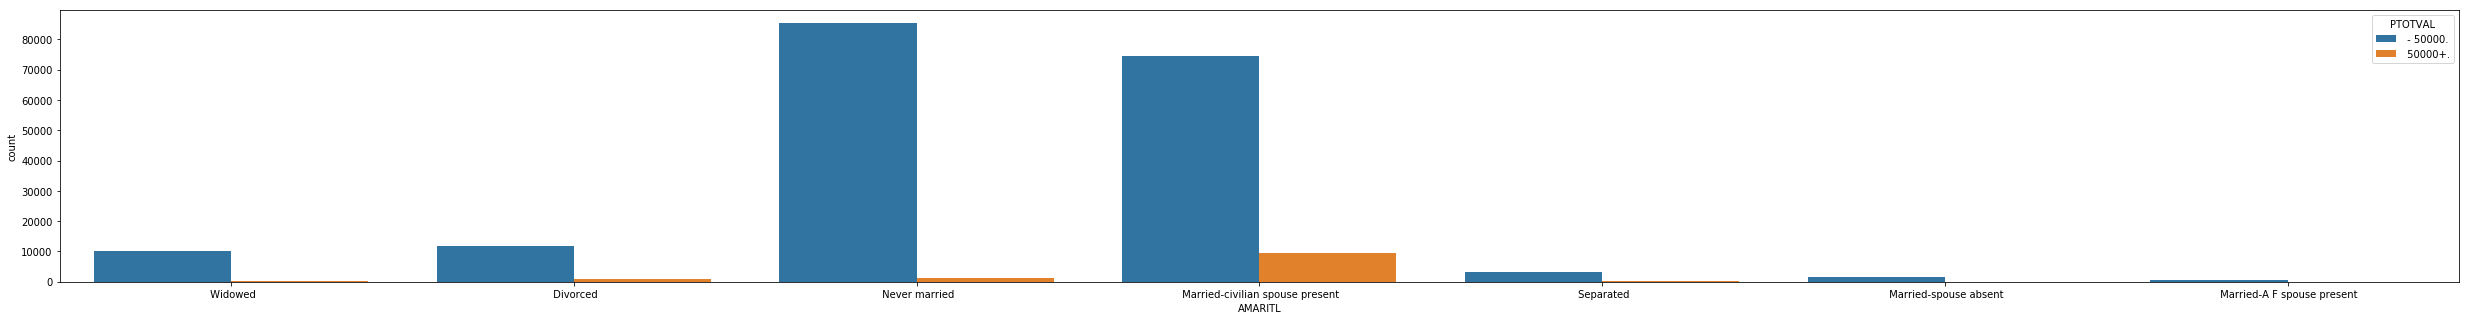

In [10]:
sns.countplot(x='AMARITL', hue='PTOTVAL', data=data_train);

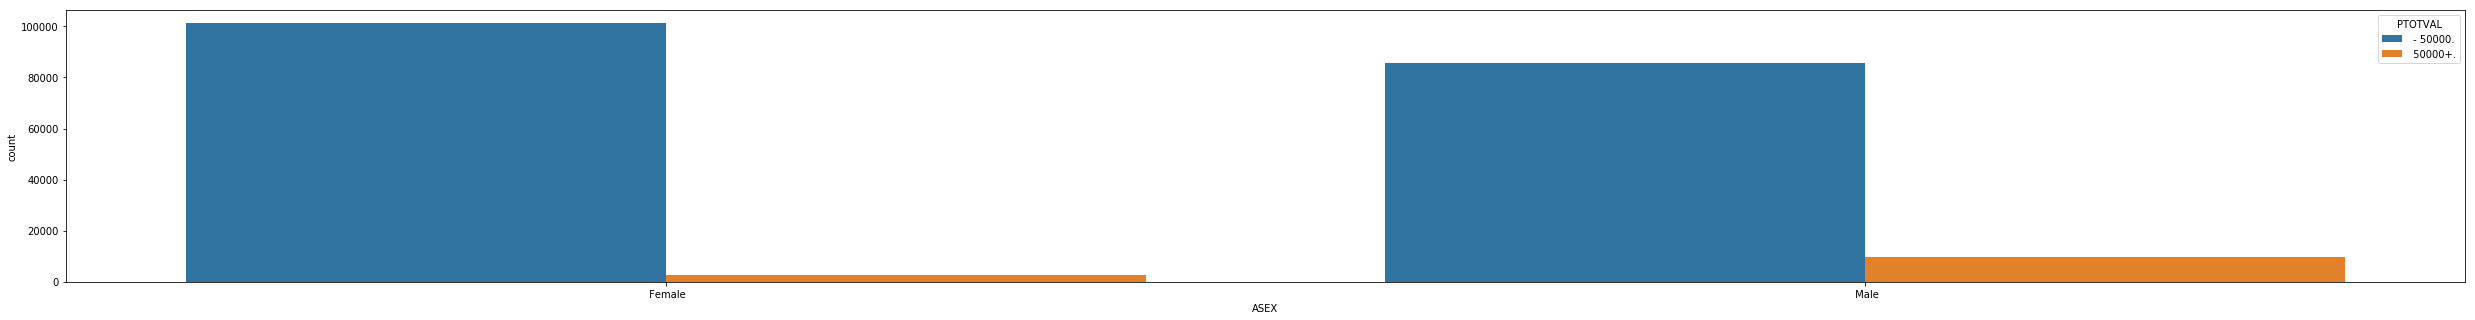

In [14]:
sns.countplot(x='ASEX', hue='PTOTVAL', data=data_train);

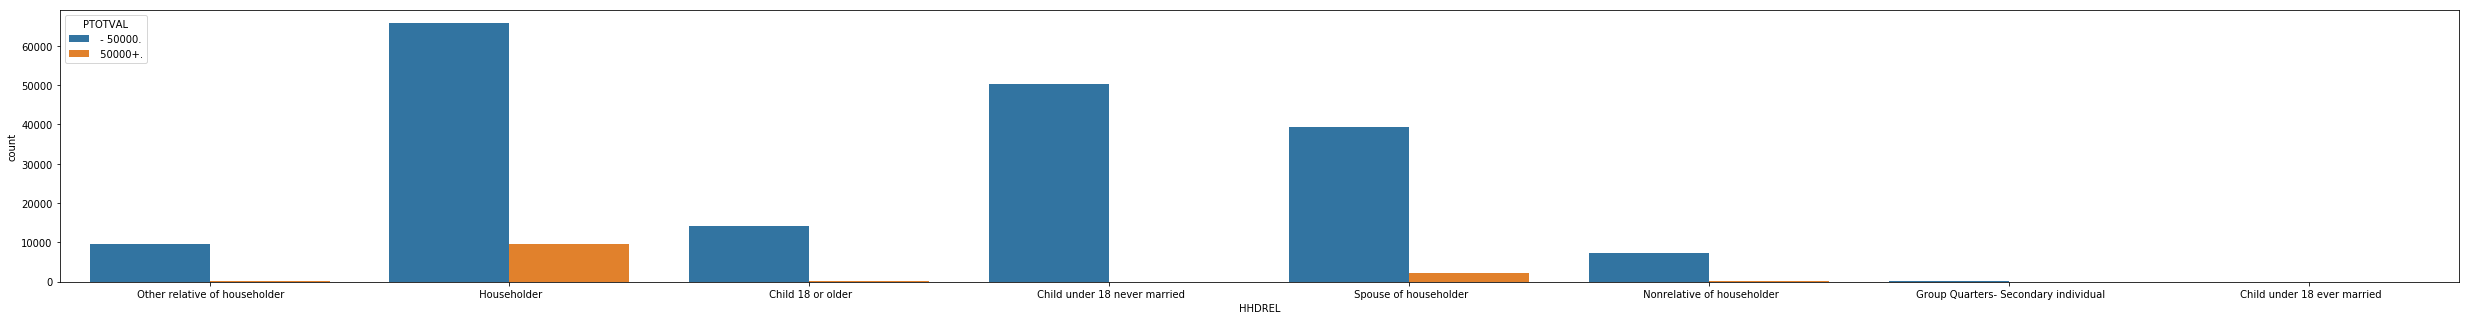

In [25]:
sns.countplot(x='HHDREL', hue='PTOTVAL', data=data_train);

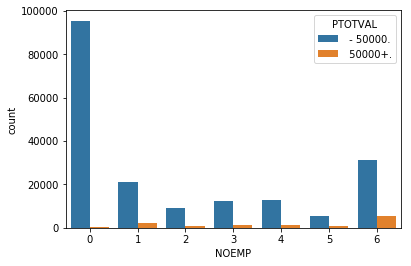

In [6]:
sns.countplot(x='NOEMP', hue='PTOTVAL', data=data_train);

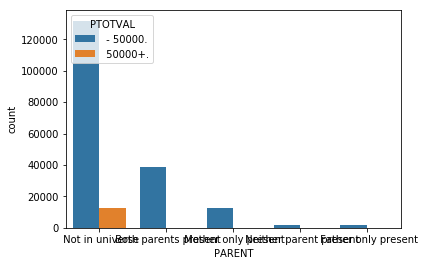

In [7]:
sns.countplot(x='PARENT', hue='PTOTVAL', data=data_train);

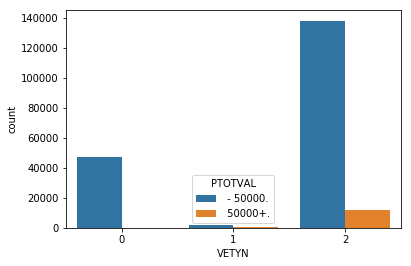

In [13]:
sns.countplot(x='VETYN', hue='PTOTVAL', data=data_train);

In [56]:
def label_encode(le, data, feature, feature_dict):
    try:
        feature_dict[feature]
        data[feature + '_le'] = data[feature].map(feature_dict[feature]).fillna(-1)
        data = data.drop([feature], axis=1)
    except KeyError:
        le.fit(data[feature].astype(str))
        data[feature + '_le'] = le.transform((data[feature].values))
        feature_dict = dict(zip(le.classes_, le.transform(le.classes_)))
        data = data.drop([feature], axis=1)
        return feature_dict

    
def binary_encode(data, feature, value):
    data[feature + '_is_' + str(value)] = pd.DataFrame([1 if i == value else 0 for i in data[feature]])

    
def preprocessing_data(data, feature_dict={}):
    
    with_null_features = ['GRINST', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN', 'PENATVTY', 
                          'PEFNTVTY', 'PEMNTVTY']
    for feature in with_null_features:
        data[feature].fillna('0', inplace=True)

    data['AHGA'] = data['AHGA'].map({' Children': 0, ' Less than 1st grade': 1, ' 1st 2nd 3rd or 4th grade':2, 
                                                 ' 5th or 6th grade': 3, ' 7th and 8th grade': 4, ' 9th grade': 5, 
                                                 ' 10th grade': 6, ' 11th grade': 7, ' 12th grade no diploma':8,
                                                 ' High school graduate': 9, ' Some college but no degree':10, 
                                                 ' Prof school degree (MD DDS DVM LLB JD)': 11, ' Associates degree-occup /vocational': 12,
                                                 ' Associates degree-academic program': 13, ' Bachelors degree(BA AB BS)': 14,
                                                 ' Masters degree(MA MS MEng MEd MSW MBA)': 15, ' Doctorate degree(PhD EdD)': 16})

    data['PTOTVAL'] = data['PTOTVAL'].map({' - 50000.': 0, ' 50000+.': 1})
    data['ASEX'] = data['ASEX'].map({' Female': 0, ' Male': 1})
    
    binary_dict = {'MIGMTR1': ' Nonmover', 'MIGMTR3': ' Nonmover', 'HHDREL': ' Householder', 'MIGMTR4': ' Nonmover',
                   'ACLSWKR': ' Private', 'ADTIND': 0, 'AMARITL': ' Married-civilian spouse present'
#                    'ADTOCC': 0, 'VETYN': 2, 'DIVVAL': 0,'GRINST': ' Not in universe', 'CAPLOSS': 0
                  }

    for item in binary_dict:
        binary_encode(data, item, binary_dict[item])
        data = data.drop([item], axis=1)
    
    le = LabelEncoder()
    le_features = ['AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'AWKSTAT', 
                'FILESTAT', 'GRINREG', 'HHDFMX', 
                'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP']

    for feature in le_features:
        temp_dict = label_encode(le, data, feature, feature_dict)
        feature_dict[feature] = temp_dict
        data = data.drop([feature], axis=1)

    dummies_features = ['AUNMEM', 'MIGSAME', 'MIGSUN', 'SEOTR', 'VETQVA', 'VETYN']
    for feature in dummies_features:
        data = pd.concat((data, pd.get_dummies(data[feature], prefix=feature + '_')),1)
        data = data.drop([feature], axis=1)
    data = data.drop(['MARSUPWT', 'AHSCOL', 'GRINST', 'AUNTYPE', 'YEAR'], axis=1)
    return (data, feature_dict)
   


In [57]:
data_train, feature_dict = preprocessing_data(data_train)
data_test = preprocessing_data(data_test, feature_dict)[0]
data_train = data_train[data_test.columns]

In [62]:
from sklearn.preprocessing import StandardScaler
X_train = data_train.drop(['PTOTVAL'], axis=1)
y_train = data_train['PTOTVAL']

X_test = data_test.drop(['PTOTVAL'], axis=1)
y_test = data_test['PTOTVAL']

# X_train = scale(X_train)
# X_test = scale(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ros = RandomOverSampler(random_state=0, ratio=0.25)
X_train, y_train = ros.fit_resample(X_train, y_train)

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_par

In [63]:
def train_predict_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy score: ' + str(metrics.accuracy_score(y_test, preds)))

    print('Recall score: ' + str(metrics.recall_score(y_test, preds)))

    print('Precision score: ' + str(metrics.precision_score( y_test, preds)))
    print(metrics.confusion_matrix(y_test, preds))

    preds = model.predict_proba(X_test)
    preds = preds[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)
    print('Auc score: ' + str(metrics.auc(fpr, tpr)))
    
    pl.figure(figsize=(8, 8,))
    pl.plot(fpr, tpr)
    pl.xlim([-0.1, 1.1])
    pl.ylim([-0.1, 1.1])
    pl.xlabel('FPR')
    pl.ylabel('TPR')
    pl.title('ROC curve (AUC={:.3f})'.format(metrics.auc(fpr, tpr)))
    pl.show()

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score: 0.9295122391291273
Recall score: 0.6425800193986421
Precision score: 0.4519099590723056
[[88755  4821]
 [ 2211  3975]]
Auc score: 0.9370318298584137


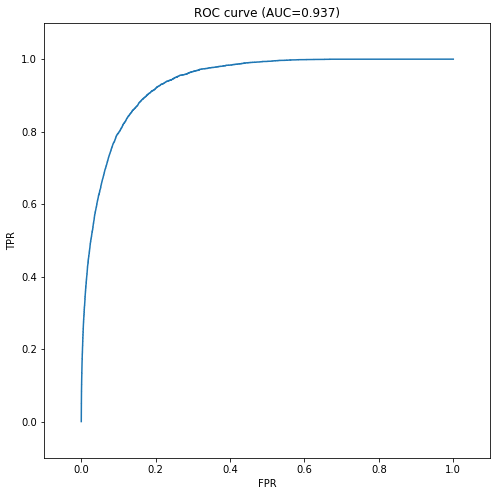

In [64]:
model_l2 = LogisticRegression(penalty='l2', random_state=42)
train_predict_model(model_l2, X_train, y_train, X_test, y_test)

Accuracy score: 0.9482668751628877
Recall score: 0.6354671839637892
Precision score: 0.5749597776802691
[[90670  2906]
 [ 2255  3931]]
Auc score: 0.9509597522885005


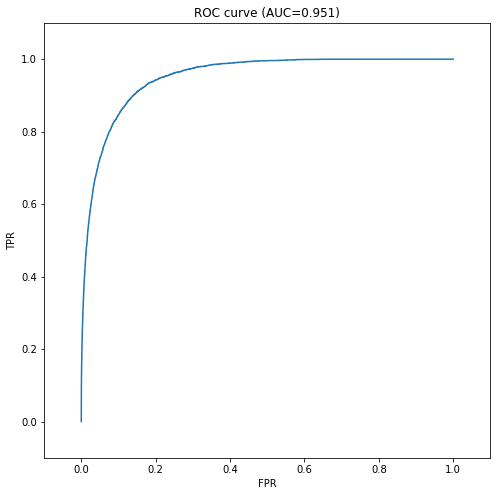

In [69]:
from sklearn.ensemble import RandomForestClassifier

forest_tree = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, max_depth=22, n_jobs=-1, random_state=42)
train_predict_model(forest_tree, X_train, y_train, X_test, y_test)

Learning rate set to 0.329121
0:	learn: 0.3925094	total: 115ms	remaining: 22.9s
1:	learn: 0.3019652	total: 220ms	remaining: 21.8s
2:	learn: 0.2723863	total: 323ms	remaining: 21.2s
3:	learn: 0.2594218	total: 433ms	remaining: 21.2s
4:	learn: 0.2545123	total: 526ms	remaining: 20.5s
5:	learn: 0.2466544	total: 643ms	remaining: 20.8s
6:	learn: 0.2433954	total: 745ms	remaining: 20.5s
7:	learn: 0.2399669	total: 857ms	remaining: 20.6s
8:	learn: 0.2369948	total: 968ms	remaining: 20.5s
9:	learn: 0.2354125	total: 1.07s	remaining: 20.3s
10:	learn: 0.2337356	total: 1.16s	remaining: 20s
11:	learn: 0.2315976	total: 1.27s	remaining: 19.9s
12:	learn: 0.2303003	total: 1.36s	remaining: 19.6s
13:	learn: 0.2288411	total: 1.47s	remaining: 19.5s
14:	learn: 0.2280324	total: 1.57s	remaining: 19.3s
15:	learn: 0.2270207	total: 1.68s	remaining: 19.3s
16:	learn: 0.2259288	total: 1.77s	remaining: 19.1s
17:	learn: 0.2250633	total: 1.88s	remaining: 19s
18:	learn: 0.2245839	total: 1.98s	remaining: 18.8s
19:	learn: 0.22

161:	learn: 0.1858655	total: 17.1s	remaining: 4.02s
162:	learn: 0.1857065	total: 17.3s	remaining: 3.92s
163:	learn: 0.1855337	total: 17.4s	remaining: 3.81s
164:	learn: 0.1853392	total: 17.5s	remaining: 3.71s
165:	learn: 0.1851276	total: 17.6s	remaining: 3.6s
166:	learn: 0.1849970	total: 17.7s	remaining: 3.49s
167:	learn: 0.1847679	total: 17.8s	remaining: 3.38s
168:	learn: 0.1846245	total: 17.9s	remaining: 3.28s
169:	learn: 0.1843355	total: 18s	remaining: 3.17s
170:	learn: 0.1842667	total: 18.1s	remaining: 3.06s
171:	learn: 0.1841408	total: 18.2s	remaining: 2.96s
172:	learn: 0.1840276	total: 18.3s	remaining: 2.85s
173:	learn: 0.1839166	total: 18.4s	remaining: 2.74s
174:	learn: 0.1838407	total: 18.5s	remaining: 2.64s
175:	learn: 0.1837146	total: 18.6s	remaining: 2.53s
176:	learn: 0.1836255	total: 18.7s	remaining: 2.42s
177:	learn: 0.1834602	total: 18.8s	remaining: 2.32s
178:	learn: 0.1833384	total: 18.9s	remaining: 2.21s
179:	learn: 0.1832164	total: 19s	remaining: 2.11s
180:	learn: 0.182

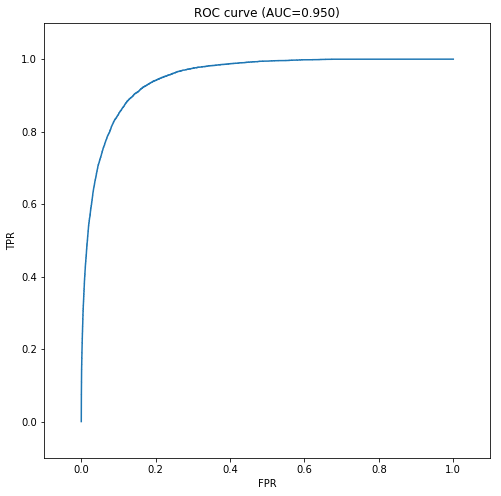

In [66]:
from catboost import CatBoostClassifier 

# categorical_columns = [c for c in X_train.columns if X_train[c].dtype.name == 'object']
# cat_features = list(map(lambda x: list(X_train.columns).index(x), categorical_columns))

cat_model = CatBoostClassifier(iterations = 200)
train_predict_model(cat_model, X_train, y_train, X_test, y_test)

# cat_model.fit(X_train, y_train, cat_features=cat_features)
# preds = cat_model.predict(X_test)

In [36]:
print('CatBoost: ')
print('Accuracy score: ' + str(metrics.accuracy_score(y_test, preds)))

print('Recall score: ' + str(metrics.recall_score(y_test, preds)))

print('Precision score: ' + str(metrics.precision_score(y_test, preds)))

print('Auc score: ' + str(metrics.roc_auc_score(y_test, preds)))

CatBoost: 
Accuracy score: 0.9583809466530342
Recall score: 0.4744584545748464
Precision score: 0.7651199165797706
Auc score: 0.7324149586715388


In [70]:
cat_model.feature_importances_


array([2.42500988e+01, 7.04278579e+00, 1.83705532e+01, 1.02948951e+00,
       4.55829184e+00, 4.93909193e+00, 2.61768498e+00, 4.32886479e+00,
       3.19172198e+00, 1.26331112e+01, 0.00000000e+00, 0.00000000e+00,
       7.41619606e-01, 2.55474265e-02, 7.91779508e-01, 2.29952610e-02,
       4.31331885e-01, 3.20307664e+00, 2.17392425e+00, 4.05921091e-01,
       4.48657919e-01, 1.92174097e-01, 2.18904761e+00, 3.95665263e-01,
       9.31233289e-01, 0.00000000e+00, 6.99904530e-01, 8.75179973e-01,
       2.63471667e-01, 2.56988207e-01, 1.47919112e-01, 4.84881292e-02,
       1.53947896e-01, 3.62499671e-02, 1.29782372e+00, 2.92830448e-01,
       0.00000000e+00, 5.11713538e-02, 1.75839484e-02, 0.00000000e+00,
       1.64634692e-01, 3.01556031e-01, 2.71970551e-01, 9.53564136e-02,
       0.00000000e+00, 4.40526812e-02, 0.00000000e+00, 5.82733552e-02,
       7.92949525e-03])

In [49]:
print(data_train.columns[42])
print(data_train.columns[43])
print(data_train.columns[44])
print(data_train.columns[45])
print(data_train.columns[46])
print(data_train.columns[47])
# print(X_train.columns[38])
# print(X_train.columns[27])
# print(X_train.columns[14])
# print(X_train.columns[40])

VETQVA__ No
VETQVA__ Not in universe
VETQVA__ Yes
VETYN__0
VETYN__1
VETYN__2


In [147]:
data_train['GRINREG_le'].value_counts()

3    183750
4      4889
5      4074
1      3575
2      2705
0       530
Name: GRINREG_le, dtype: int64

In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 48 columns):
AAGE                                           199523 non-null int64
ADTOCC                                         199523 non-null int64
AHGA                                           199523 non-null int64
ASEX                                           199523 non-null int64
CAPGAIN                                        199523 non-null int64
DIVVAL                                         199523 non-null int64
NOEMP                                          199523 non-null int64
WKSWORK                                        199523 non-null int64
PTOTVAL                                        199523 non-null int64
MIGMTR1_is_ Nonmover                           199523 non-null int64
MIGMTR3_is_ Nonmover                           199523 non-null int64
HHDREL_is_ Householder                         199523 non-null int64
MIGMTR4_is_ Nonmover                           199523 non-nul

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFBA4CE898>,
      dtype=object)

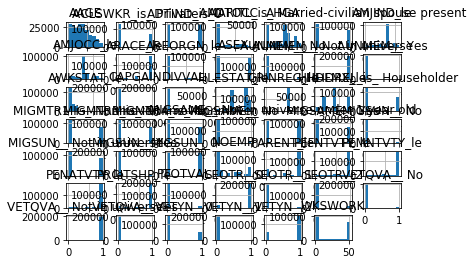

In [51]:
data_train.hist();

In [104]:
data_train['AUNTYPE_le'].value_counts()

3    193453
4      2038
5      2019
1       976
0       598
2       439
Name: AUNTYPE_le, dtype: int64

In [ ]:
sns.pairplot(data_train, hue='PTOTVAL');

C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\NikitsinskayaH\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWar

KeyboardInterrupt: 